# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
data_dir = '../noaa-runtime/data/'

In [2]:
dst_labs = pd.read_csv(data_dir+'dst_labels.csv')
sat_pos  = pd.read_csv(data_dir+'satellite_positions.csv')
sol_wind = pd.read_csv(data_dir+'solar_wind.csv')
sunspots = pd.read_csv(data_dir+'sunspots.csv')

## Data shape, Columns and Nans

In [19]:
def print_df_info(df):
    print ("data shape:", df.shape, '\n')
    print ("data columns:", df.columns, '\n')
    print ("The Null values in the data:\n", df.isnull().sum(), '\n' )
    display ( df.head(5) )

In [20]:
print_df_info(dst_labs)

data shape: (139872, 3) 

data columns: Index(['period', 'timedelta', 'dst'], dtype='object') 

The Null values in the data:
 period       0
timedelta    0
dst          0
dtype: int64 

['train_a' 'train_b' 'train_c'] 



,period,timedelta,dst
0,train_a,0 days 00:00:00,-7
1,train_a,0 days 01:00:00,-10
2,train_a,0 days 02:00:00,-10
3,train_a,0 days 03:00:00,-6
4,train_a,0 days 04:00:00,-2


In [14]:
print_df_info(sat_pos)

data shape: (5828, 8) 

data columns: Index(['period', 'timedelta', 'gse_x_ace', 'gse_y_ace', 'gse_z_ace',
       'gse_x_dscovr', 'gse_y_dscovr', 'gse_z_dscovr'],
      dtype='object') 

The Null values in the data:
 period             0
timedelta          0
gse_x_ace          0
gse_y_ace          0
gse_z_ace          0
gse_x_dscovr    4794
gse_y_dscovr    4794
gse_z_dscovr    4794
dtype: int64 



,period,timedelta,gse_x_ace,gse_y_ace,gse_z_ace,gse_x_dscovr,gse_y_dscovr,gse_z_dscovr
0,train_a,0 days,1522376.9,143704.6,149496.7,NaN,NaN,NaN
1,train_a,1 days,1525410.9,136108.8,151034.1,NaN,NaN,NaN
2,train_a,2 days,1528484.9,128470.5,152387.7,NaN,NaN,NaN
3,train_a,3 days,1531570.3,120818.4,153561.4,NaN,NaN,NaN
4,train_a,4 days,1534633.1,113178.5,154534.6,NaN,NaN,NaN


In [16]:
print_df_info(sol_wind)

data shape: (8392320, 17) 

data columns: Index(['period', 'timedelta', 'bx_gse', 'by_gse', 'bz_gse', 'theta_gse',
       'phi_gse', 'bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt',
       'density', 'speed', 'temperature', 'source'],
      dtype='object') 

The Null values in the data:
 period              0
timedelta           0
bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64 



,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac


In [15]:
print_df_info(sunspots)

data shape: (192, 3) 

data columns: Index(['period', 'timedelta', 'smoothed_ssn'], dtype='object') 

The Null values in the data:
 period          0
timedelta       0
smoothed_ssn    0
dtype: int64 



,period,timedelta,smoothed_ssn
0,train_a,0 days 00:00:00,65.4
1,train_a,13 days 00:00:00,72.0
2,train_a,44 days 00:00:00,76.9
3,train_a,74 days 00:00:00,80.8
4,train_a,105 days 00:00:00,85.4


### Information so far
- `dst_labs` file has no Null values. 
- `sat_pos` file has some Null values in `gse_x_dscovr`, `gse_y_dscovr` and `gse_z_dscovr`.
- `sol_wind` file has a lot of Null values.
- `sunspots` file has no Null values. 

also `sol_wind` is the main file which has 8392320 rows, too big to make plots and so on so for the data vizualization purpose we'll use only the first 10000 rows.

With the discussion in the group we also decided to discard the columns `'bx_gsm','by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'source'` from the `sol_wind` data. As `bx_gse` and `bx_gsm` and similarly for `y` and `z` they look the same. And we are ignoring the theta dn phi coordinate of measurement.

## Some Plots

In [21]:
sw = sol_wind[:10000]

In [22]:
sw.head(2)

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac


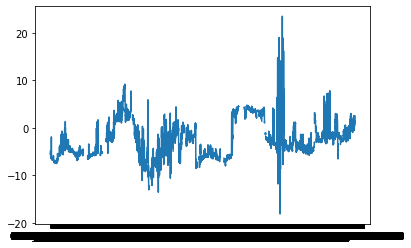

In [23]:
#data.head()
#
plt.plot(sw.timedelta, sw.bx_gse )
plt.show()

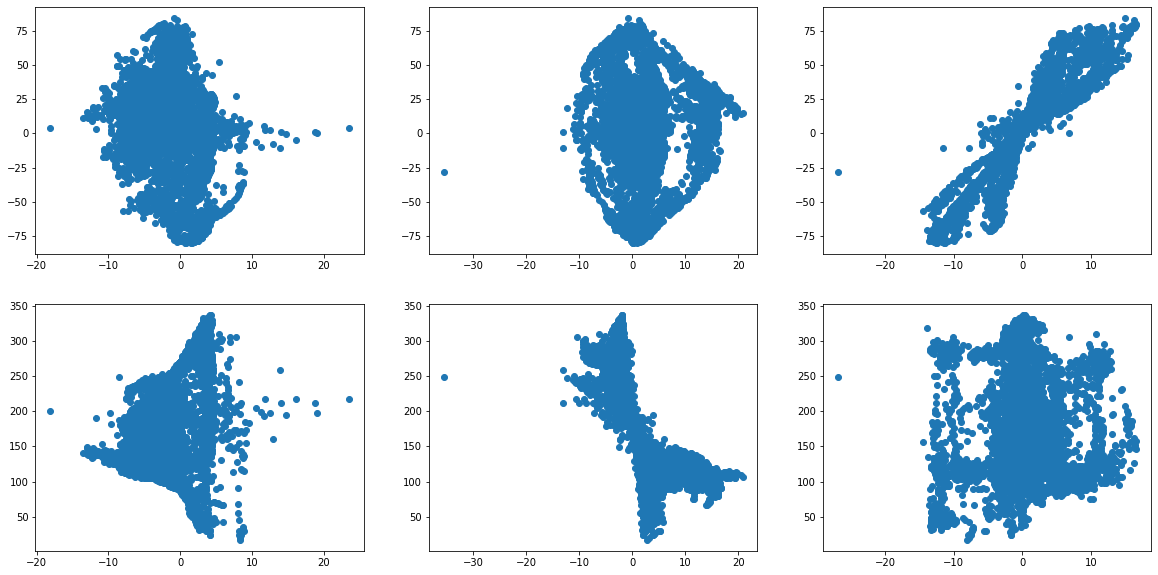

In [24]:
plt.figure(1, figsize=(20,10))
plt.subplot(231)
plt.scatter(sw['bx_gse'], sw['theta_gse'])
plt.subplot(232)
plt.scatter(sw['by_gse'], sw['theta_gse'])
plt.subplot(233)
plt.scatter(sw['bz_gse'], sw['theta_gse'])

plt.subplot(234)
plt.scatter(sw['bx_gse'], sw['phi_gse'])
plt.subplot(235)
plt.scatter(sw['by_gse'], sw['phi_gse'])
plt.subplot(236)
plt.scatter(sw['bz_gse'], sw['phi_gse'])

In [ ]:

data = sol_wind[:10000]
# convert the timedelta to datetime object
data['timedelta'] = pd.to_timedelta( data['timedelta'] )
display ( data.head(2) )

In [ ]:
dst_labs.head(2)

In [ ]:
sat_pos.head(2)

In [ ]:
sol_wind.head(2)

In [ ]:
sol_wind.timedelta

In [ ]:
sunspots.head(2)

In [ ]:
print ( sol_wind.shape )
data = sol_wind[:5000]
print (data.shape )

In [ ]:
#data.head()
#
plt.plot(data.timedelta, data.bx_gse )
plt.show()

In [ ]:
data1 = data['bx_gse']**2+data['by_gse']**2+data['bz_gse']**2
plt.scatter(data['bt'], data1)

In [ ]:
plt.figure(1, figsize=(20,4))
plt.subplot(121)
plt.scatter(data['bt'], data['theta_gse'])
plt.subplot(122)
plt.scatter(data['bt'], data['phi_gse'])



In [ ]:
plt.figure(1, figsize=(20,10))
plt.subplot(231)
plt.scatter(data['bx_gse'], data['theta_gse'])
plt.subplot(232)
plt.scatter(data['by_gse'], data['theta_gse'])
plt.subplot(233)
plt.scatter(data['bz_gse'], data['theta_gse'])

plt.subplot(234)
plt.scatter(data['bx_gse'], data['phi_gse'])
plt.subplot(235)
plt.scatter(data['by_gse'], data['phi_gse'])
plt.subplot(236)
plt.scatter(data['bz_gse'], data['phi_gse'])